In [138]:
# Red Wine/ Portuguese "Vinho Verde" wine samples from the north 
# of Portugal. The goal is to model wine quality based on 
# physicochemical tests. The classes are ordered and not balanced 
# (e.g. there are many more normal wines than excellent or
# poor ones). Variables include 
# fixed_acidity
# volatile_acidity	
# citric_acid		
# residual_sugar	
# chlorides	Feature	
# free_sulfur_dioxide	
# total_sulfur_dioxide	
# density	
# pH	
# sulphates	
# alcohol	
#quality	Target	Integer	score between 0 and 10




In [140]:
# Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J.
# (2009). Wine Quality [Dataset]. UCI Machine Learning Repository.
# https://doi.org/10.24432/C56S3T.




In [142]:
#!pip install xgboost

In [144]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error as MSE
import os

In [146]:
red_data = "Desktop/winequality-red.csv"
red_wine = pd.read_csv(red_data, sep= ";")
red_wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [166]:
count_table = red_wine['alcohol'].value_counts().reset_index()
count_table.columns = ['value', 'count']  # Rename columns for clarity

print(count_table)

        value  count
0    9.500000    139
1    9.400000    103
2    9.800000     78
3    9.200000     72
4   10.000000     67
..        ...    ...
60   9.950000      1
61   9.233333      1
62   9.250000      1
63   9.050000      1
64  10.750000      1

[65 rows x 2 columns]


In [148]:
red_wine.shape

(1599, 12)

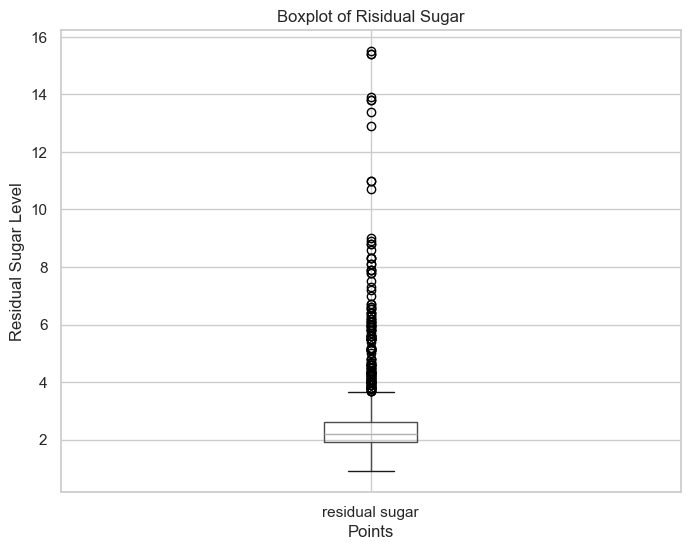

In [225]:
plt.figure(figsize=(8, 6))
red_wine.boxplot(column='residual sugar')
plt.title('Boxplot of Risidual Sugar')
plt.xlabel('Points')
plt.ylabel('Residual Sugar Level')
plt.show()

<Axes: xlabel='citric acid', ylabel='residual sugar'>

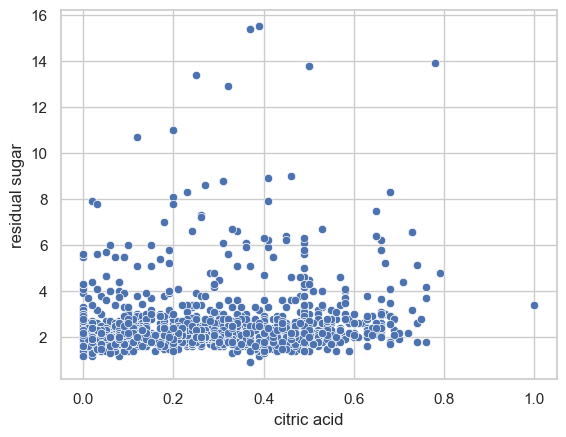

In [213]:
sns.scatterplot(x="citric acid", y="residual sugar", data=red_wine)

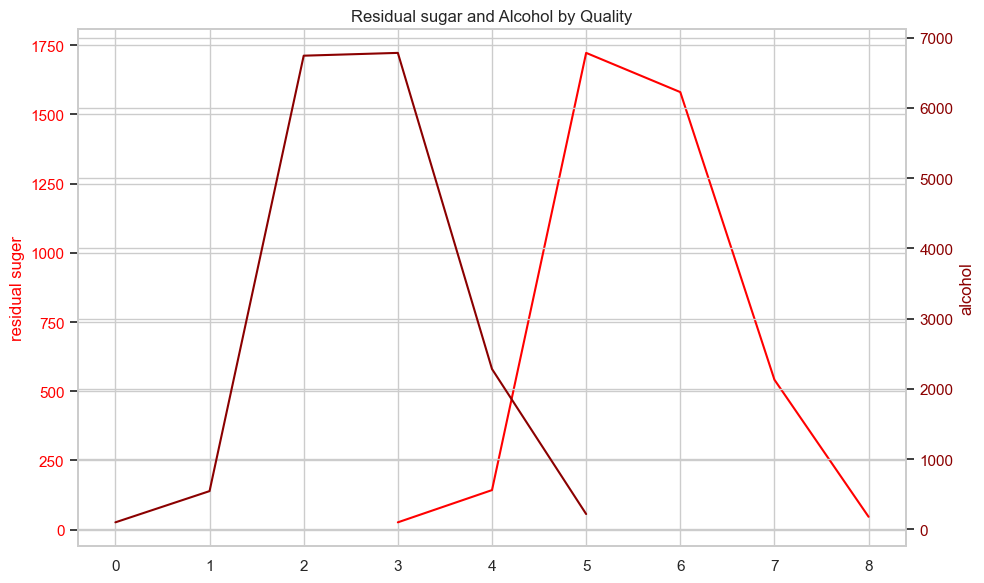

In [230]:
sns.set_theme(style="whitegrid")
quality=red_wine.groupby('quality')[['fixed acidity', 'citric acid', 'residual sugar', 'density', 'pH', 'alcohol',]].sum().reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(quality['quality'], quality['residual sugar'], color='red', label='residual sugar')
ax1.set_ylabel('residual suger', color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.plot(quality['alcohol'], color='darkred', label='alcohol')
ax2.set_ylabel('alcohol', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

plt.title('Residual sugar and Alcohol by Quality')
fig.tight_layout()
plt.show()


<Axes: xlabel='fixed acidity', ylabel='density'>

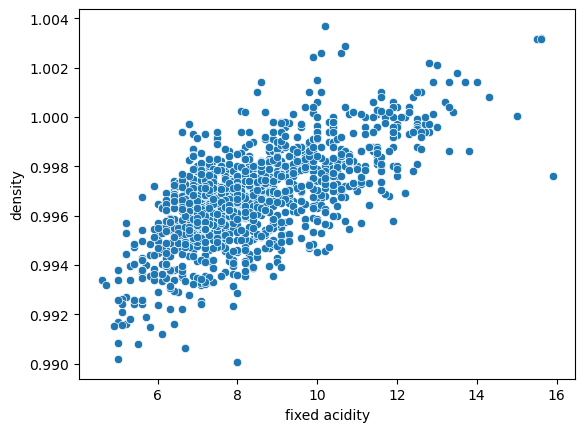

In [154]:
sns.scatterplot(x="fixed acidity", y="density", data=red_wine)

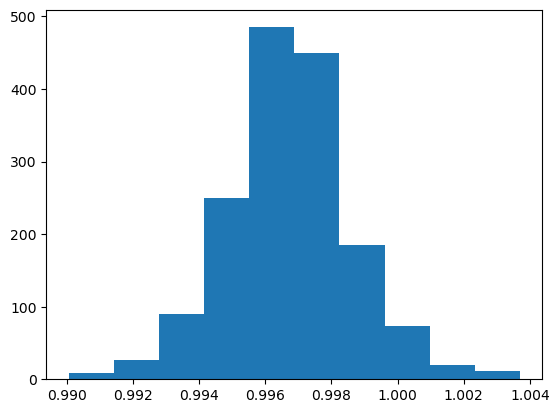

In [156]:
plt.hist(red_wine["density"])
plt.show()

Accuracy: 0.7188

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       213
           1       0.75      0.75      0.75       267

    accuracy                           0.72       480
   macro avg       0.72      0.71      0.72       480
weighted avg       0.72      0.72      0.72       480



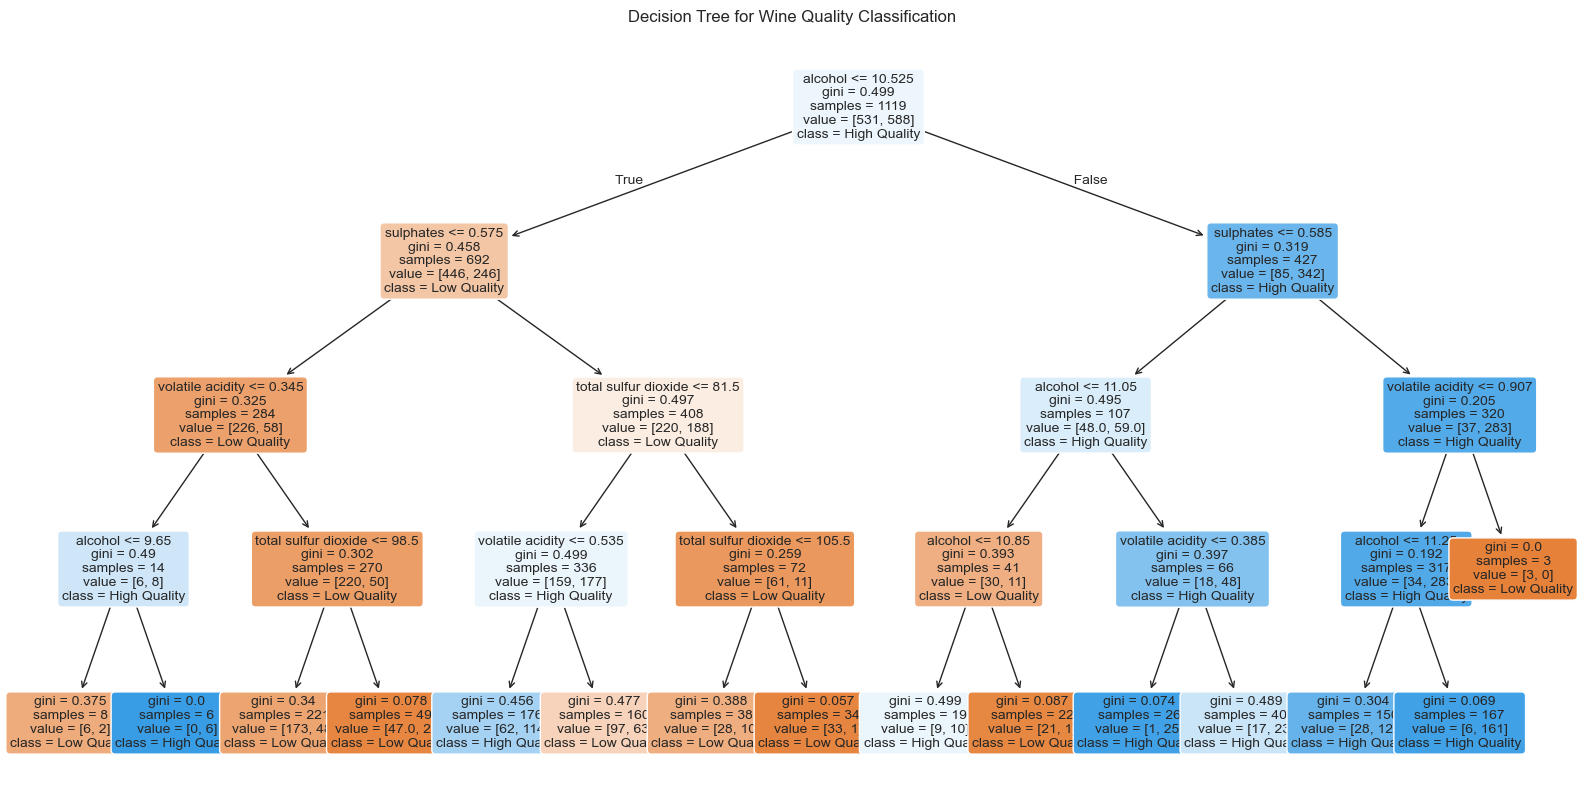

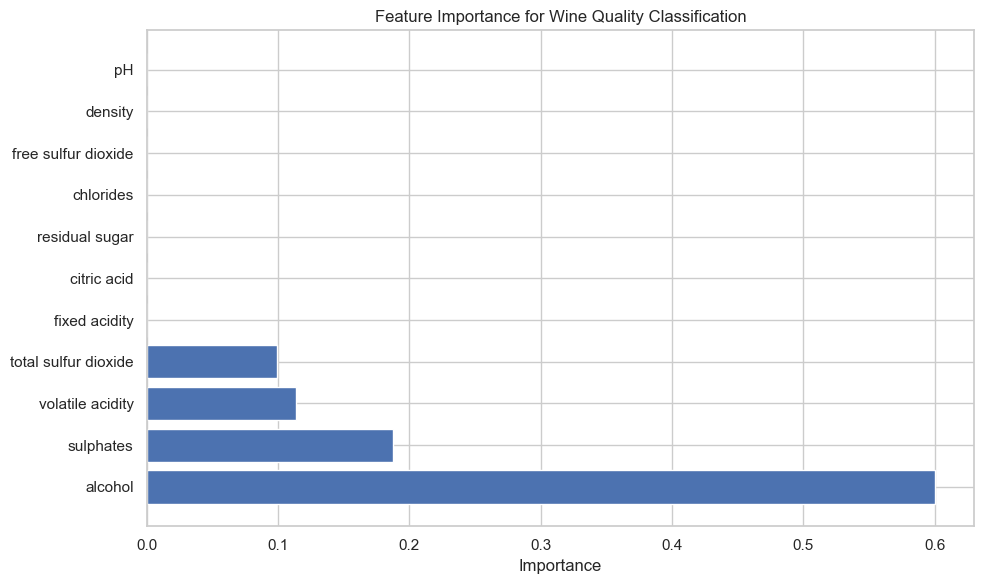

In [280]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt

red_wine['high_quality'] = (red_wine['quality'] >= 6).astype(int)

features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 
            'density', 'pH', 'sulphates', 'alcohol']

X = red_wine[features]
y = red_wine['high_quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(20, 10))
tree.plot_tree(dt_model, feature_names=features, class_names=['Low Quality', 'High Quality'], 
               filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree for Wine Quality Classification')
plt.show()

feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance for Wine Quality Classification')
plt.tight_layout()
plt.show()

In [ ]:
# Conclusion shows accuracy rate at 71.88%. The most important
# features are alcohol, volatile acidity, sulphate, total sulfur dioxide.




